In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Se cargan los datos:
import pandas as pd
data = pd.read_csv('Comentarios_Ejemplo.csv', delimiter=";")
data.head()

,ratingComments,Sentiment,category
0,Es muy caro! Bajad los precios!,N,Price
1,Lo habéis puesto más caro,N,Price
2,Los coches que tenéis no se corresponden con e...,N,Price
3,Espero que bajeis el precio,N,Price
4,"Cobráis por todo, a este ritmo yo me cambio",N,Price


In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='category'>

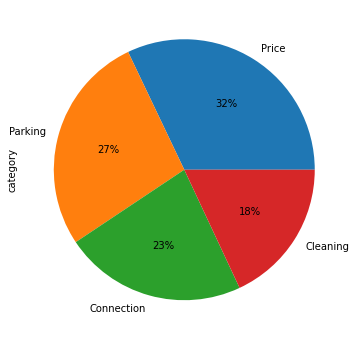

In [4]:
data.category.value_counts().plot(kind='pie', autopct="%1.0f%%")

<AxesSubplot:ylabel='Sentiment'>

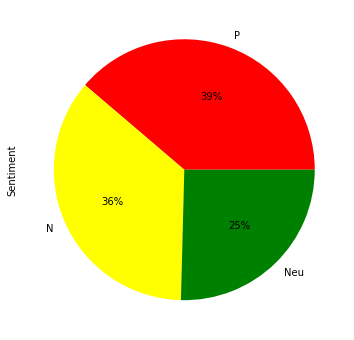

In [5]:
data.Sentiment.value_counts().plot(kind='pie', autopct="%1.0f%%", colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='category'>

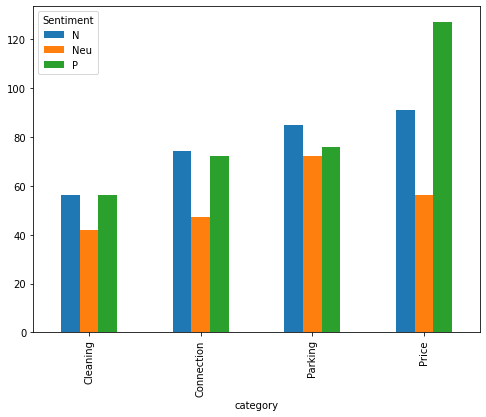

In [6]:
category_sentiment = data.groupby(['category', 'Sentiment']).Sentiment.count().unstack()
category_sentiment.plot(kind='bar')

In [7]:
# 1.Se convierte la columna rating comments a minuscula:
data["ratingComments"] = data["ratingComments"].str.lower()
data.head() 

,ratingComments,Sentiment,category
0,es muy caro! bajad los precios!,N,Price
1,lo habéis puesto más caro,N,Price
2,los coches que tenéis no se corresponden con e...,N,Price
3,espero que bajeis el precio,N,Price
4,"cobráis por todo, a este ritmo yo me cambio",N,Price


In [8]:
# 2. Se quitan los espaciados innecesarios:

data["ratingComments"] = data["ratingComments"].str.strip()

data.head() 

,ratingComments,Sentiment,category
0,es muy caro! bajad los precios!,N,Price
1,lo habéis puesto más caro,N,Price
2,los coches que tenéis no se corresponden con e...,N,Price
3,espero que bajeis el precio,N,Price
4,"cobráis por todo, a este ritmo yo me cambio",N,Price


In [9]:
# 3. Se eliminan los signos de puntuación (signos, comas, etc.)

from string import punctuation as punc

for ch in punc:
    if ch in data["ratingComments"]:
        data["ratingComments"]=data["ratingComments"].replace(ch, '')
        
data["ratingComments"]=data["ratingComments"].str.replace("?","")
data["ratingComments"]=data["ratingComments"].str.replace("!","")
data["ratingComments"]=data["ratingComments"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

data.head() 

<ipython-input-9-b464aa3b027c>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["ratingComments"]=data["ratingComments"].str.replace("?","")


,ratingComments,Sentiment,category
0,es muy caro bajad los precios,N,Price
1,lo habeis puesto mas caro,N,Price
2,los coches que teneis no se corresponden con e...,N,Price
3,espero que bajeis el precio,N,Price
4,"cobrais por todo, a este ritmo yo me cambio",N,Price


In [10]:
# 4. Se realiza el proceso de stemming

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("spanish")

df = pd.DataFrame(data, columns = ['ratingComments']) 

df['ratingComments'] = df['ratingComments'].str.split()

pd.set_option('display.max_colwidth', -1)

df['ratingComments'] = df['ratingComments'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

data['ratingComments']=df['ratingComments']

data['ratingComments'] = [','.join(map(str, l)) for l in data['ratingComments']]

<ipython-input-10-6828978d1b7a>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [11]:
# 5.Realizamos un proceso manual para reducir palabaras a su raíz:

data["ratingComments"]=data["ratingComments"].str.replace("abiertas","abiert")
data["ratingComments"]=data["ratingComments"].str.replace("abrid","abiert")
data["ratingComments"]=data["ratingComments"].str.replace("abrieron","abiert")
data["ratingComments"]=data["ratingComments"].str.replace("abrir","abiert")
data["ratingComments"]=data["ratingComments"].str.replace("adme","adem")
data["ratingComments"]=data["ratingComments"].str.replace("acabais","acab")
data["ratingComments"]=data["ratingComments"].str.replace("acparc","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("aparcar","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("acparc","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("actualizacion","actualiz")
data["ratingComments"]=data["ratingComments"].str.replace("ademas","adem")
data["ratingComments"]=data["ratingComments"].str.replace("agradezc","agradec")
data["ratingComments"]=data["ratingComments"].str.replace("ahora","ahor")
data["ratingComments"]=data["ratingComments"].str.replace("alegri'","alegr")
data["ratingComments"]=data["ratingComments"].str.replace("alguien'","algu")
data["ratingComments"]=data["ratingComments"].str.replace("algun'","algu")
data["ratingComments"]=data["ratingComments"].str.replace("algui'","algu")
data["ratingComments"]=data["ratingComments"].str.replace("altos","alto")
data["ratingComments"]=data["ratingComments"].str.replace("amigo","amig")
data["ratingComments"]=data["ratingComments"].str.replace("amigos","amig")
data["ratingComments"]=data["ratingComments"].str.replace("ampliais","ampli")
data["ratingComments"]=data["ratingComments"].str.replace("amigos","amig")
data["ratingComments"]=data["ratingComments"].str.replace("antes","anterior")
data["ratingComments"]=data["ratingComments"].str.replace("aparcado","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("aparcando","aparc") 
data["ratingComments"]=data["ratingComments"].str.replace("aparcar","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("aparcas","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("aparqu","aparc")
data["ratingComments"]=data["ratingComments"].str.replace("apareci","aparec")
data["ratingComments"]=data["ratingComments"].str.replace("aplico","aplicar")
data["ratingComments"]=data["ratingComments"].str.replace("aplicacion","app")                                                         
data["ratingComments"]=data["ratingComments"].str.replace("arreglenl","arregl")
data["ratingComments"]=data["ratingComments"].str.replace("arregladla","arregl")
data["ratingComments"]=data["ratingComments"].str.replace("arregladlo","arregl")
data["ratingComments"]=data["ratingComments"].str.replace("arreglais","arregl")
data["ratingComments"]=data["ratingComments"].str.replace("asiento","asient")
data["ratingComments"]=data["ratingComments"].str.replace("asientos","asient")
data["ratingComments"]=data["ratingComments"].str.replace("asqueroso","asquer") 
data["ratingComments"]=data["ratingComments"].str.replace("aunqeu","aunqu")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("bajais","baj")
data["ratingComments"]=data["ratingComments"].str.replace("bajeis","bajeis")
data["ratingComments"]=data["ratingComments"].str.replace("bajo","bajeis")                                                         
data["ratingComments"]=data["ratingComments"].str.replace("baratit","barat")
data["ratingComments"]=data["ratingComments"].str.replace("baratito","barat")
data["ratingComments"]=data["ratingComments"].str.replace("barato","barat")
data["ratingComments"]=data["ratingComments"].str.replace("baratos","barat")
data["ratingComments"]=data["ratingComments"].str.replace("barrio","barri")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("bonito","bonit")
data["ratingComments"]=data["ratingComments"].str.replace("bueno","buen")
data["ratingComments"]=data["ratingComments"].str.replace("calculais","calcul")
data["ratingComments"]=data["ratingComments"].str.replace("cam","cambi")
data["ratingComments"]=data["ratingComments"].str.replace("cambiado","cambi")
data["ratingComments"]=data["ratingComments"].str.replace("cambieis","cambi")
data["ratingComments"]=data["ratingComments"].str.replace("car","caro")
data["ratingComments"]=data["ratingComments"].str.replace("caros","caro")
data["ratingComments"]=data["ratingComments"].str.replace("cartera","carter")
data["ratingComments"]=data["ratingComments"].str.replace("cigarros","tabac")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("cliente","client")
data["ratingComments"]=data["ratingComments"].str.replace("cobrais","cobr")
data["ratingComments"]=data["ratingComments"].str.replace("cobreis","cobr")
data["ratingComments"]=data["ratingComments"].str.replace("cobrando","cobr")
data["ratingComments"]=data["ratingComments"].str.replace("coches","coch")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("coche","coch")
data["ratingComments"]=data["ratingComments"].str.replace("coj","cog")
data["ratingComments"]=data["ratingComments"].str.replace("cojo","cog")
data["ratingComments"]=data["ratingComments"].str.replace("comodo","comod")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("conexion","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conectaba","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conectando","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conectar","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conectarme","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conectividad","conect") 
data["ratingComments"]=data["ratingComments"].str.replace("conetxion","conect")
data["ratingComments"]=data["ratingComments"].str.replace("conexion","conect")
data["ratingComments"]=data["ratingComments"].str.replace("contento","content")
data["ratingComments"]=data["ratingComments"].str.replace("contabiliz","cont")  
data["ratingComments"]=data["ratingComments"].str.replace("contando","cont") 
data["ratingComments"]=data["ratingComments"].str.replace("copiloto","copilot")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("cos","cost")
data["ratingComments"]=data["ratingComments"].str.replace("correcto","correct")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("cuest","cost")
data["ratingComments"]=data["ratingComments"].str.replace("culpa","culp")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("dais","dar")
data["ratingComments"]=data["ratingComments"].str.replace("da","dar")
data["ratingComments"]=data["ratingComments"].str.replace("dab","dar")
data["ratingComments"]=data["ratingComments"].str.replace("dad","dar")
data["ratingComments"]=data["ratingComments"].str.replace("dais","dar")
data["ratingComments"]=data["ratingComments"].str.replace("dand","dar")
data["ratingComments"]=data["ratingComments"].str.replace("dari","dar")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("deberiais","deb")
data["ratingComments"]=data["ratingComments"].str.replace("deberi","deb")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("decepcion","dec")
data["ratingComments"]=data["ratingComments"].str.replace("defraud","dec")
data["ratingComments"]=data["ratingComments"].str.replace("dejais","dej")
data["ratingComments"]=data["ratingComments"].str.replace("dejar","dej")                                                            
data["ratingComments"]=data["ratingComments"].str.replace("demasi","dem")
data["ratingComments"]=data["ratingComments"].str.replace("descarga","descarg")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("descuento","descuent")
data["ratingComments"]=data["ratingComments"].str.replace("descuentos","descuent")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("devolucion","devolv")
data["ratingComments"]=data["ratingComments"].str.replace("devolvais","devolv")
data["ratingComments"]=data["ratingComments"].str.replace("devolveis","devolv")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("devuelv","devolv")
data["ratingComments"]=data["ratingComments"].str.replace("devuelva","devolv")
data["ratingComments"]=data["ratingComments"].str.replace("dias","dia")
data["ratingComments"]=data["ratingComments"].str.replace("dich","dic")
data["ratingComments"]=data["ratingComments"].str.replace("dijeron","dic")
data["ratingComments"]=data["ratingComments"].str.replace("dinero","diner")
data["ratingComments"]=data["ratingComments"].str.replace("economico","econom")
data["ratingComments"]=data["ratingComments"].str.replace("dinero","diner")
data["ratingComments"]=data["ratingComments"].str.replace("encantari","encant")
data["ratingComments"]=data["ratingComments"].str.replace("encuentr","encontr")
data["ratingComments"]=data["ratingComments"].str.replace("enfadado","enfad")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("esperaba","esper")
data["ratingComments"]=data["ratingComments"].str.replace("esperando","esper")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("estais","estar")
data["ratingComments"]=data["ratingComments"].str.replace("estan","estar")
data["ratingComments"]=data["ratingComments"].str.replace("estba","estar")
data["ratingComments"]=data["ratingComments"].str.replace("esten","estar")                                                         
data["ratingComments"]=data["ratingComments"].str.replace("estupendo","estupend")
data["ratingComments"]=data["ratingComments"].str.replace("excesivo","exces")
data["ratingComments"]=data["ratingComments"].str.replace("fantastico","fantast")
data["ratingComments"]=data["ratingComments"].str.replace("fastidieis","fastidi")
data["ratingComments"]=data["ratingComments"].str.replace("felicitar","felic")
data["ratingComments"]=data["ratingComments"].str.replace("feliz","felic")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("finaliz","felic")
data["ratingComments"]=data["ratingComments"].str.replace("fumador","tabac")
data["ratingComments"]=data["ratingComments"].str.replace("fum","tabac")
data["ratingComments"]=data["ratingComments"].str.replace("funcionado","funcion") 
data["ratingComments"]=data["ratingComments"].str.replace("funcionab","funcion")
data["ratingComments"]=data["ratingComments"].str.replace("gente","gent")
data["ratingComments"]=data["ratingComments"].str.replace("guarros","guarr")
data["ratingComments"]=data["ratingComments"].str.replace("gusot","gust")
data["ratingComments"]=data["ratingComments"].str.replace("gustari","gust")
data["ratingComments"]=data["ratingComments"].str.replace("gustaz","gust")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("habeis","hab")
data["ratingComments"]=data["ratingComments"].str.replace("haber","hab")
data["ratingComments"]=data["ratingComments"].str.replace("habi","hab")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("habi","hac")
data["ratingComments"]=data["ratingComments"].str.replace("habr","hac")
data["ratingComments"]=data["ratingComments"].str.replace("haceis","hac")
data["ratingComments"]=data["ratingComments"].str.replace("haci","hac")  
data["ratingComments"]=data["ratingComments"].str.replace("hagais","hac")  
data["ratingComments"]=data["ratingComments"].str.replace("hago","hac")
data["ratingComments"]=data["ratingComments"].str.replace("hagt","hac")
data["ratingComments"]=data["ratingComments"].str.replace("hermos","hac")
data["ratingComments"]=data["ratingComments"].str.replace("hic","hac")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("hayais","hac")
data["ratingComments"]=data["ratingComments"].str.replace("hech","hac")
data["ratingComments"]=data["ratingComments"].str.replace("horrible","hor")
data["ratingComments"]=data["ratingComments"].str.replace("horribl","hor")
data["ratingComments"]=data["ratingComments"].str.replace("horror","hor") 
data["ratingComments"]=data["ratingComments"].str.replace("iba","ir")
data["ratingComments"]=data["ratingComments"].str.replace("ido","ir")
data["ratingComments"]=data["ratingComments"].str.replace("impecable","impec")
data["ratingComments"]=data["ratingComments"].str.replace("imposible","impos")                                                             
data["ratingComments"]=data["ratingComments"].str.replace("incident","incid")
data["ratingComments"]=data["ratingComments"].str.replace("incomoda","incomod")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("incribl","increibl")
data["ratingComments"]=data["ratingComments"].str.replace("inmejorable","inmejor")
data["ratingComments"]=data["ratingComments"].str.replace("izquierdo","izquierd")
data["ratingComments"]=data["ratingComments"].str.replace("lado","lad")
data["ratingComments"]=data["ratingComments"].str.replace("limpia","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpiais","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpiar","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpiez","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpieza","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpio","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpisim","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("limpit","limpi")
data["ratingComments"]=data["ratingComments"].str.replace("llamado","llam")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("limpiaparabrisas","limpiaparabris")
data["ratingComments"]=data["ratingComments"].str.replace("llegue","lleg")
data["ratingComments"]=data["ratingComments"].str.replace("lujaz","lujo")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("maravillosos","maravill")
data["ratingComments"]=data["ratingComments"].str.replace("majos","maj")
data["ratingComments"]=data["ratingComments"].str.replace("malisim","mal")
data["ratingComments"]=data["ratingComments"].str.replace("mala","mal")
data["ratingComments"]=data["ratingComments"].str.replace("maravilla","maravill")
data["ratingComments"]=data["ratingComments"].str.replace("maravillosos","maravill")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("megaatascos","atasc")
data["ratingComments"]=data["ratingComments"].str.replace("menudo","menud")
data["ratingComments"]=data["ratingComments"].str.replace("menuda","menud")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("mercado","merc")
data["ratingComments"]=data["ratingComments"].str.replace("minutos","minut")
data["ratingComments"]=data["ratingComments"].str.replace("mira","mir")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("mismo","mism")
data["ratingComments"]=data["ratingComments"].str.replace("muchisim","much")
data["ratingComments"]=data["ratingComments"].str.replace("muchisimo","much")
data["ratingComments"]=data["ratingComments"].str.replace("muy","much")
data["ratingComments"]=data["ratingComments"].str.replace("muuy","much")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("multa","mult")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("necesit","necesar")
data["ratingComments"]=data["ratingComments"].str.replace("necesari","necesar")
data["ratingComments"]=data["ratingComments"].str.replace("notaa","not")
data["ratingComments"]=data["ratingComments"].str.replace("nuevit","nuev")
data["ratingComments"]=data["ratingComments"].str.replace("nuevo","nuev")
data["ratingComments"]=data["ratingComments"].str.replace("oli","olor")
data["ratingComments"]=data["ratingComments"].str.replace("pagais","pag")
data["ratingComments"]=data["ratingComments"].str.replace("parkings","parking")
data["ratingComments"]=data["ratingComments"].str.replace("personal","person")
data["ratingComments"]=data["ratingComments"].str.replace("pesima","pesim")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("pod","poder")
data["ratingComments"]=data["ratingComments"].str.replace("podeis","poder")
data["ratingComments"]=data["ratingComments"].str.replace("podiais","poder")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("podri","poder")
data["ratingComments"]=data["ratingComments"].str.replace("podriais","poder")
data["ratingComments"]=data["ratingComments"].str.replace("pud","poder")
data["ratingComments"]=data["ratingComments"].str.replace("pued","poder")  
data["ratingComments"]=data["ratingComments"].str.replace("puede","poder")                                                            
data["ratingComments"]=data["ratingComments"].str.replace("pon","poner")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("pong","poner")
data["ratingComments"]=data["ratingComments"].str.replace("poneis","poner")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("pongais","poner")
data["ratingComments"]=data["ratingComments"].str.replace("precio","preci")
data["ratingComments"]=data["ratingComments"].str.replace("precios","preci")
data["ratingComments"]=data["ratingComments"].str.replace("pregunta","pregunt")
data["ratingComments"]=data["ratingComments"].str.replace("precio","preci")
data["ratingComments"]=data["ratingComments"].str.replace("pringoso","pringos")
data["ratingComments"]=data["ratingComments"].str.replace("prisa","pris")
data["ratingComments"]=data["ratingComments"].str.replace("problemas","problem")
data["ratingComments"]=data["ratingComments"].str.replace("queja","quej")
data["ratingComments"]=data["ratingComments"].str.replace("quer","querer")
data["ratingComments"]=data["ratingComments"].str.replace("queri","querer")                                                        
data["ratingComments"]=data["ratingComments"].str.replace("quereis","querer")
data["ratingComments"]=data["ratingComments"].str.replace("quier","querer")
data["ratingComments"]=data["ratingComments"].str.replace("quiera","querer")
data["ratingComments"]=data["ratingComments"].str.replace("rajaz","raj")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("rapidit","rapid")
data["ratingComments"]=data["ratingComments"].str.replace("recomendar","recomend")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("reduzcais","reduc")
data["ratingComments"]=data["ratingComments"].str.replace("regenial","genial")
data["ratingComments"]=data["ratingComments"].str.replace("rentable","rentabl")
data["ratingComments"]=data["ratingComments"].str.replace("reluci'","reluci")
data["ratingComments"]=data["ratingComments"].str.replace("reluciente","reluci")
data["ratingComments"]=data["ratingComments"].str.replace("relucient","reluci")
data["ratingComments"]=data["ratingComments"].str.replace("rentable","rentabl")
data["ratingComments"]=data["ratingComments"].str.replace("resuelv","resolv")
data["ratingComments"]=data["ratingComments"].str.replace("revisadl","revis")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("ruina","ruin")
data["ratingComments"]=data["ratingComments"].str.replace("sabeis","sab")
data["ratingComments"]=data["ratingComments"].str.replace("sabi","sab")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("salg","sal")
data["ratingComments"]=data["ratingComments"].str.replace("sali","sal")
data["ratingComments"]=data["ratingComments"].str.replace("sacais","sac")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("seais","ser")
data["ratingComments"]=data["ratingComments"].str.replace("seri","ser")
data["ratingComments"]=data["ratingComments"].str.replace("senaliz","senal")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("servicio","servici")
data["ratingComments"]=data["ratingComments"].str.replace("servic","servici")
data["ratingComments"]=data["ratingComments"].str.replace("servici","servici")  
data["ratingComments"]=data["ratingComments"].str.replace("servicios","servici")
data["ratingComments"]=data["ratingComments"].str.replace("solucioinad0","solucion")
data["ratingComments"]=data["ratingComments"].str.replace("solucioneis","solucion")
data["ratingComments"]=data["ratingComments"].str.replace("sonaba","son")                                                            
data["ratingComments"]=data["ratingComments"].str.replace("sitios","siti")
data["ratingComments"]=data["ratingComments"].str.replace("subis","sub")
data["ratingComments"]=data["ratingComments"].str.replace("subi","sub")
data["ratingComments"]=data["ratingComments"].str.replace("suciedad","suci")
data["ratingComments"]=data["ratingComments"].str.replace("sucio","suci")
data["ratingComments"]=data["ratingComments"].str.replace("sucios","suci")
data["ratingComments"]=data["ratingComments"].str.replace("sucisimo","suci")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("sucied","suci")
data["ratingComments"]=data["ratingComments"].str.replace("sucio","suci")
data["ratingComments"]=data["ratingComments"].str.replace("suplicio","suplici")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("supong","sup")
data["ratingComments"]=data["ratingComments"].str.replace("tambi","tamb")
data["ratingComments"]=data["ratingComments"].str.replace("tambien","tamb") 
data["ratingComments"]=data["ratingComments"].str.replace("tanto","tant")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("teneis","ten")
data["ratingComments"]=data["ratingComments"].str.replace("tengais'","ten")
data["ratingComments"]=data["ratingComments"].str.replace("teneis","ten")
data["ratingComments"]=data["ratingComments"].str.replace("teni","ten")
data["ratingComments"]=data["ratingComments"].str.replace("teniais","ten")
data["ratingComments"]=data["ratingComments"].str.replace("tiempor","tiemp")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("todo","tod")
data["ratingComments"]=data["ratingComments"].str.replace("trafico","trafic")
data["ratingComments"]=data["ratingComments"].str.replace("traser","tras")
data["ratingComments"]=data["ratingComments"].str.replace("trayecto","trayect")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("usad","usa")
data["ratingComments"]=data["ratingComments"].str.replace("usar","usa")
data["ratingComments"]=data["ratingComments"].str.replace("usarl","usa")
data["ratingComments"]=data["ratingComments"].str.replace("usen","usa")
data["ratingComments"]=data["ratingComments"].str.replace("uso","usa")
data["ratingComments"]=data["ratingComments"].str.replace("use","usa")
data["ratingComments"]=data["ratingComments"].str.replace("usaros","usa")
data["ratingComments"]=data["ratingComments"].str.replace("usen","usa") 
data["ratingComments"]=data["ratingComments"].str.replace("uso","usa") 
data["ratingComments"]=data["ratingComments"].str.replace("utiliz","usa")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("vais","va")
data["ratingComments"]=data["ratingComments"].str.replace("vam","va")
data["ratingComments"]=data["ratingComments"].str.replace("van","va")
data["ratingComments"]=data["ratingComments"].str.replace("veng","va")
data["ratingComments"]=data["ratingComments"].str.replace("vien","va")
data["ratingComments"]=data["ratingComments"].str.replace("va","ir")                                                        
data["ratingComments"]=data["ratingComments"].str.replace("verl","ver")
data["ratingComments"]=data["ratingComments"].str.replace("vist","ver")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("vei","ver")
data["ratingComments"]=data["ratingComments"].str.replace("vi","ver")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("veo","ver") 
data["ratingComments"]=data["ratingComments"].str.replace("vist","ver")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("ventanas","ventan")
data["ratingComments"]=data["ratingComments"].str.replace("verguenz","vergonz")
data["ratingComments"]=data["ratingComments"].str.replace("ventanill","ventan")
data["ratingComments"]=data["ratingComments"].str.replace("viaje","viaj") 
data["ratingComments"]=data["ratingComments"].str.replace("viajecit","viaj")
data["ratingComments"]=data["ratingComments"].str.replace("vibracion","vibr")
data["ratingComments"]=data["ratingComments"].str.replace("vid","viv")
data["ratingComments"]=data["ratingComments"].str.replace("vida","viv")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("volveis","volv")
data["ratingComments"]=data["ratingComments"].str.replace("vomito","vomit")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("voy","ir")                                                          
data["ratingComments"]=data["ratingComments"].str.replace("vosootr","vosotros")
data["ratingComments"]=data["ratingComments"].str.replace("vueltas","vuelt")
data["ratingComments"]=data["ratingComments"].str.replace("vuesttr","vuestra")                                                           
data["ratingComments"]=data["ratingComments"].str.replace("yho","yo")
data["ratingComments"]=data["ratingComments"].str.replace("zona","zon")
data["ratingComments"]=data["ratingComments"].str.replace("zonas","zon")

In [12]:
gb = data.groupby('category')    
[gb.get_group(x) for x in gb.groups]

[                                                                    ratingComments  \
 103  el,coch,estab,much,limpi                                                        
 104  desd,la,ultim,vez,ha,mejor,mil,la,conect,y,ahor,el,coch,esta,mas,limpi.,felic   
 105  coch,limpi,y,buen,funcion                                                       
 106  olor,a,limpi.,que,nuev,esta                                                     
 107  limpi                                                                           
 ..     ...                                                                           
 761  al,atraves,un,charc,de,barr,he,ensuci,el,coch,,lo,sient                         
 762  no,he,poder,evert,ensuci,el,coch                                                
 763  hab,un,senor,de,la,limpi,cuand,lleg                                             
 764  cuant,limpiis,estos,coch                                                        
 765  se,poder,ped,que,te,limpi,el,coch,ant

In [13]:
#Price
Price=gb.get_group('Price')

#Cleaning
Cleaning=gb.get_group('Cleaning')

#Parking
Parking=gb.get_group('Parking')

#Conection
Conection=gb.get_group('Connection')

In [14]:
#Price
features_Price = Price.iloc[:, 0].values
labels_Price = Price.iloc[:, 1].values

#Cleaning
features_Cleaning = Cleaning.iloc[:, 0].values
labels_Cleaning = Cleaning.iloc[:, 1].values

#Parking
features_Parking = Parking.iloc[:, 0].values
labels_Parking = Parking.iloc[:, 1].values

#Conection
features_Conection = Conection.iloc[:, 0].values
labels_Conection = Conection.iloc[:, 1].values

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))


#Price
processed_features_Price = vectorizer.fit_transform(features_Price).toarray()

#Cleaning
processed_features_Cleaning = vectorizer.fit_transform(features_Cleaning).toarray()

#Parking
processed_features_Parking = vectorizer.fit_transform(features_Parking).toarray()

#Conection
processed_features_Conection = vectorizer.fit_transform(features_Conection).toarray()


In [16]:
from sklearn.model_selection import train_test_split


#Price
X_train_Price, X_test_Price, Y_train_Price, Y_test_Price = train_test_split(processed_features_Price, labels_Price, test_size=0.2, random_state=0)

#Cleaning
X_train_Cleaning, X_test_Cleaning, Y_train_Cleaning, Y_test_Cleaning = train_test_split(processed_features_Cleaning, labels_Cleaning, test_size=0.2, random_state=0)

#Parking
X_train_Parking, X_test_Parking, Y_train_Parking, Y_test_Parking = train_test_split(processed_features_Parking, labels_Parking, test_size=0.2, random_state=0)

#Conection
X_train_Conection, X_test_Conection, Y_train_Conection, Y_test_Conection = train_test_split(processed_features_Conection, labels_Conection, test_size=0.2, random_state=0)


In [17]:
print("Price")

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_Price, Y_train_Price)
print(nbModel_grid.best_estimator_)

Price
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.08111308307896872)


In [18]:
nbModel_grid.fit(X_train_Cleaning, Y_train_Cleaning)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.657933224657568)


In [19]:
nbModel_grid.fit(X_train_Parking, Y_train_Parking)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.01519911082952933)


In [20]:
nbModel_grid.fit(X_train_Conection, Y_train_Conection)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)


In [18]:
from sklearn.naive_bayes import GaussianNB

#Price
text_classifier_Price = GaussianNB(var_smoothing=0.08111308307896872)
text_classifier_Price.fit(X_train_Price, Y_train_Price)

#Cleaning
text_classifier_Cleaning = GaussianNB(var_smoothing=0.657933224657568)
text_classifier_Cleaning.fit(X_train_Cleaning, Y_train_Cleaning)

#Parking
text_classifier_Parking = GaussianNB(var_smoothing=0.01519911082952933)
text_classifier_Parking.fit(X_train_Parking, Y_train_Parking)

#Conection
text_classifier_Conection = GaussianNB(var_smoothing=0.02848035868435802)
text_classifier_Conection.fit(X_train_Conection, Y_train_Conection)


GaussianNB(var_smoothing=0.02848035868435802)

In [19]:
#Price
predictions_Price = text_classifier_Price.predict(X_test_Price)

#Cleaning
predictions_Cleaning = text_classifier_Cleaning.predict(X_test_Cleaning)

#Parking
predictions_Parking = text_classifier_Parking.predict(X_test_Parking)

#Conection
predictions_Conection = text_classifier_Conection.predict(X_test_Conection)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Price
print("Price")
print(confusion_matrix(Y_test_Price,predictions_Price))
print(classification_report(Y_test_Price,predictions_Price))
print(accuracy_score(Y_test_Price, predictions_Price))

#Cleaning
print("Cleaning")
print(confusion_matrix(Y_test_Cleaning,predictions_Cleaning))
print(classification_report(Y_test_Cleaning,predictions_Cleaning))
print(accuracy_score(Y_test_Cleaning, predictions_Cleaning))

#Parking
print("Parking")
print(confusion_matrix(Y_test_Parking,predictions_Parking))
print(classification_report(Y_test_Parking,predictions_Parking))
print(accuracy_score(Y_test_Parking, predictions_Parking))

#Conection
print("Conection")
print(confusion_matrix(Y_test_Conection,predictions_Conection))
print(classification_report(Y_test_Conection,predictions_Conection))
print(accuracy_score(Y_test_Conection, predictions_Conection))

Price
[[10  3  2]
 [ 1 13  0]
 [ 1  4 21]]
              precision    recall  f1-score   support

           N       0.83      0.67      0.74        15
         Neu       0.65      0.93      0.76        14
           P       0.91      0.81      0.86        26

    accuracy                           0.80        55
   macro avg       0.80      0.80      0.79        55
weighted avg       0.82      0.80      0.80        55

0.8
Cleaning
[[9 2 3]
 [0 5 1]
 [0 2 9]]
              precision    recall  f1-score   support

           N       1.00      0.64      0.78        14
         Neu       0.56      0.83      0.67         6
           P       0.69      0.82      0.75        11

    accuracy                           0.74        31
   macro avg       0.75      0.76      0.73        31
weighted avg       0.80      0.74      0.75        31

0.7419354838709677
Parking
[[14  1  0]
 [ 2 12  0]
 [ 2  1 15]]
              precision    recall  f1-score   support

           N       0.78      0.93  

In [21]:
text_classifier_Price.get_params()

{'priors': None, 'var_smoothing': 0.08111308307896872}

In [22]:
text_classifier_Cleaning.get_params()

{'priors': None, 'var_smoothing': 0.657933224657568}

In [24]:
text_classifier_Parking.get_params()

{'priors': None, 'var_smoothing': 0.01519911082952933}

In [23]:
text_classifier_Conection.get_params()

{'priors': None, 'var_smoothing': 0.02848035868435802}